In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import random
import threading # Too lazy to wait for simulation.

def verify_sorted(arr: List[int]) -> bool:
    for i in range(1, len(arr)):
        if arr[i-1] > arr[i]:
            return False 
    return True

RAND_SEED = 69

# Context
> In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

**Notes**
- `S=0` is normal merge sort
- `S -> +Inf` is insertion sort

# (a) Algorithm implementation: Implement the above hybrid algorithm

## Insertion Sort Implementation

In [2]:
def insertion_sort(arr):
    arr = [x for x in arr]
    key_comparisons = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0:
            key_comparisons += 1
            if key < arr[j]:
                arr[j + 1] = arr[j]
                j -= 1
            else:
                break
        arr[j + 1] = key
    return arr, key_comparisons


## Hybrid Merge Sort
Set `S=0` for normal merge sort

In [3]:
# (Sorted, Comparisons)
def hybrid_merge_sort(arr: List[int], S: int = 0) -> Tuple[List[int], int]:
    if len(arr) == 0:
        return ([], 0)
    if len(arr) == 1:
        return ([arr[0]], 0)

    if len(arr) <= S:
        # Copy arr to avoid mutations.
        sorted_arr, comparisons = insertion_sort(arr)
        return sorted_arr, comparisons
    
    # Normal merge sort
    if len(arr) == 2:
        if arr[0] < arr [1]:
            return ([arr[0], arr[1]], 1)
        return ([arr[1], arr[0]], 1)
    
    # Merge
    mid = len(arr) // 2
    merged_left, key_comparisons_left = hybrid_merge_sort(arr[:mid], S)
    merged_right, key_comparisons_right = hybrid_merge_sort(arr[mid:], S)
    lptr, rptr = 0, 0

    result: List[int] = []
    key_comparisons = key_comparisons_left + key_comparisons_right
    while (lptr < len(merged_left) or rptr < len(merged_right)):
        key_comparisons += 1
        if lptr < len(merged_left) and rptr < len(merged_right):
            if merged_left[lptr] < merged_right[rptr]:
                result.append(merged_left[lptr])
                lptr += 1
            else:
                result.append(merged_right[rptr])
                rptr += 1
        elif lptr < len(merged_left):
            result.append(merged_left[lptr])
            lptr += 1
        # rptr must be < len(merged_right)
        else:
            result.append(merged_right[rptr])
            rptr += 1

    return (result, key_comparisons)


## Testing implementation for sort.

In [4]:
arr = [2, 6, 4, 1, 3, 8, 7, 5]
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")

arr = [1, 2, 3, 4, 5, 6, 7, 8]
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")

arr = [1, 3, 2]
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")

arr = []
sorted_arr, comparisons = hybrid_merge_sort(arr)
print(f"Sorted: {sorted_arr}, Key Comparisons: {comparisons}, Is Sorted: {verify_sorted(sorted_arr)}")



Sorted: [1, 2, 3, 4, 5, 6, 7, 8], Key Comparisons: 20, Is Sorted: True
Sorted: [1, 2, 3, 4, 5, 6, 7, 8], Key Comparisons: 20, Is Sorted: True
Sorted: [1, 2, 3], Key Comparisons: 4, Is Sorted: True
Sorted: [], Key Comparisons: 0, Is Sorted: True


# (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [5]:
bar_chart_dataset = []
datasets = []
MAX = 1000000

random.seed(RAND_SEED)

# ----
# Bar chart data set
# ----
sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000]
examples_per_size = 1
for size in sizes:
    examples = []
    for _ in range(examples_per_size):
        examples.append([
            random.randint(1, size) for _ in range(size)
        ])
    bar_chart_dataset.append({
        "size": size,
        "examples": examples
    })


# (c) Analyze time complexity: Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case.

> With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity. 
> 
> With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

In [6]:
tests = [{
    "S": 0,
    "X": [],
    "Y": [],
    "color": "green"
},
{
    "S": 4,
    "X": [],
    "Y": [],
    "color": "orange"
},
{
    "S": 8,
    "X": [],
    "Y": [],
    "color": "red"
},
{
    "S": 16,
    "X": [],
    "Y": [],
    "color": "purple"
}, 
{
    "S": 32,
    "X": [],
    "Y": [],
    "color": "yellow"
},
]

# print("Test")
# print([size['size'] for size in bar_chart_dataset])
def run_test(test):
    for dataset in bar_chart_dataset:
        tally_comparisons = 0
    
        size = dataset['size']
        print(f"Sorting S={test['S']} for size={size}")
        examples = dataset['examples']
        for example in examples:
            sorted_arr, comparisons = hybrid_merge_sort(example, test['S'])
            tally_comparisons += comparisons
    
        test['X'].append(size)
        test['Y'].append(tally_comparisons / len(examples))
    
threads = []
for i, test in enumerate(tests):
    thread = threading.Thread(target=run_test, args=(test,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()



Sorting S=0 for size=1000
Sorting S=0 for size=5000
Sorting S=0 for size=10000
Sorting S=4 for size=1000
Sorting S=4 for size=5000
Sorting S=4 for size=10000
Sorting S=0 for size=50000
Sorting S=8 for size=1000
Sorting S=8 for size=5000
Sorting S=8 for size=10000
Sorting S=16 for size=1000
Sorting S=16 for size=5000
Sorting S=4 for size=50000
Sorting S=16 for size=10000
Sorting S=8 for size=50000
Sorting S=32 for size=1000
Sorting S=32 for size=5000
Sorting S=16 for size=50000
Sorting S=32 for size=10000
Sorting S=32 for size=50000
Sorting S=4 for size=100000
Sorting S=0 for size=100000
Sorting S=8 for size=100000
Sorting S=16 for size=100000
Sorting S=32 for size=100000
Sorting S=8 for size=500000
Sorting S=4 for size=500000
Sorting S=32 for size=500000
Sorting S=0 for size=500000
Sorting S=16 for size=500000
Sorting S=8 for size=1000000
Sorting S=32 for size=1000000
Sorting S=4 for size=1000000
Sorting S=16 for size=1000000
Sorting S=0 for size=1000000
Sorting S=8 for size=5000000
So

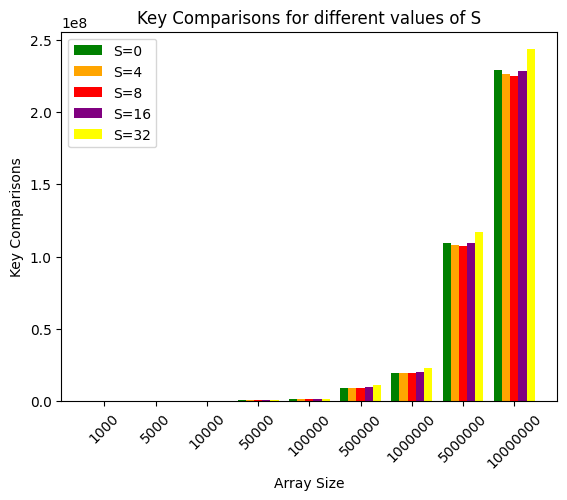

In [7]:
categories = [f"{size}" for size in sizes]

x = np.arange(len(categories))
width = 0.8 / len(tests)

for i, test in enumerate(tests):
    offset = (i - (len(tests) - 1) / 2) * width
    plt.bar(x + offset, test['Y'], width, label=f'S={test["S"]}', color=test['color'])

plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.title('Key Comparisons for different values of S')
plt.xticks(x, categories)
plt.xticks(rotation=45)
plt.legend()
plt.show()


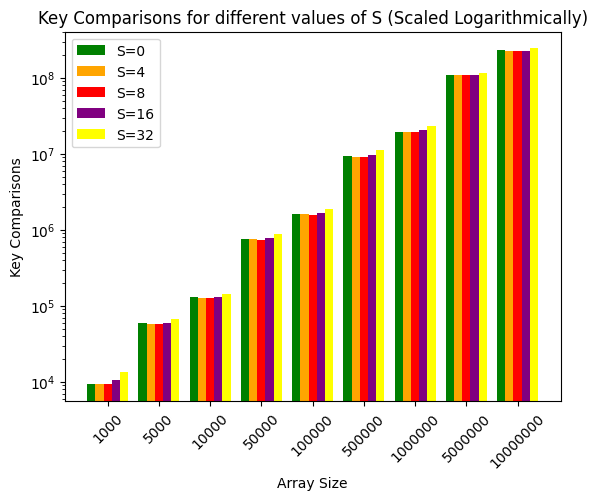

In [8]:
categories = [f"{size}" for size in sizes]

x = np.arange(len(categories))
width = 0.8 / len(tests)

for i, test in enumerate(tests):
    offset = (i - (len(tests) - 1) / 2) * width
    plt.bar(x + offset, test['Y'], width, label=f'S={test["S"]}', color=test['color'])

plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.title('Key Comparisons for different values of S (Scaled Logarithmically)')
plt.xticks(x, categories)
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend()
plt.show()

> Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

Based on the above plots, `S=32` requires more comparisons than normal merge sort. So we can scope our search down `S<32`.

For our test, we will use as many samples as reasonable to reduce variability on finding the average key comparisons for each `S`.

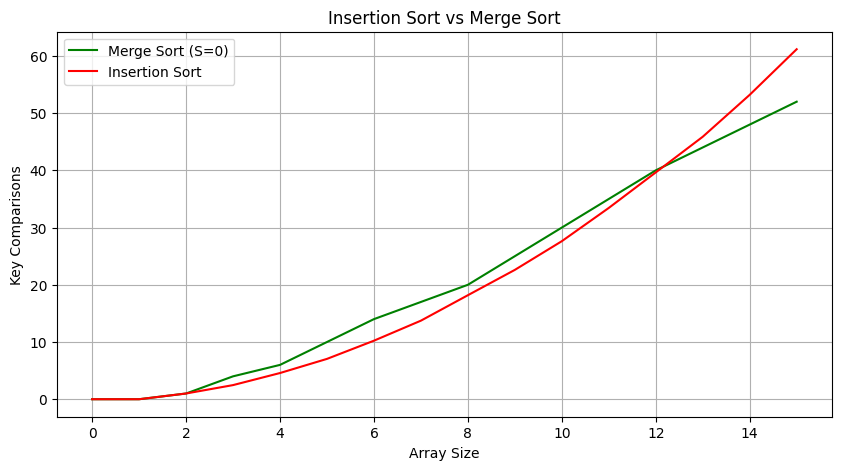

In [9]:
examples_per_size = 1000
analysis_dataset = []
MAX = 1000000
for size in range(0, 16):
    examples = []
    for _ in range(examples_per_size):
        examples.append([
            random.randint(1, size) for _ in range(size)
        ])
    analysis_dataset.append({
        "size": size,
        "examples": examples
    })

find_s_tests = [
    {
        "label": "Merge Sort (S=0)",
        "sort_function": lambda arr: hybrid_merge_sort(arr, 0),
        "color": "green",
        "X": [],
        "Y": [],
    },
    {
        "label": "Insertion Sort",
        "sort_function": lambda arr: insertion_sort(arr),
        "color": "red",
        "X": [],
        "Y": [],
    },
]

for dataset in analysis_dataset:
    tally_comparisons = [0 for i in range(len(tests))]
    
    size = dataset['size']
    examples = dataset['examples']
    for example in examples:
        for i, test in enumerate(find_s_tests):
            sorted_arr, comparisons = test['sort_function'](example)
            tally_comparisons[i] += comparisons
    
    for i, test in enumerate(find_s_tests):
        test['X'].append(size)
        test['Y'].append(tally_comparisons[i] / len(examples))

# Plot the results
plt.figure(figsize=(10, 5))

for test in find_s_tests:
    plt.plot(test['X'], test['Y'], label=test['label'], color=test['color'])

plt.grid(True)
plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.title('Insertion Sort vs Merge Sort')
plt.legend()
plt.show()



We want to choose the highest `S` where **insertion sort is more efficient than merge sort**.

**So S is around 12**

# (d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

Recall, `S=0` means normal merge sort.

In [10]:
comaprison_tests = [
{
    "S": 0, # Merge sort.
    "X": [],
    "Y": [],
    "duration": [],
    "color": "green"
}, 
{
    "S": 8, # Bottom range of our ideal S.
    "X": [],
    "Y": [],
    "duration": [],
    "color": "red"
}, 
{
    "S": 12, # Our ideal S.
    "X": [],
    "Y": [],
    "duration": [],
    "color": "orange"
}, 
{
    "S": 16, # Upper range of our ideal S.
    "X": [],
    "Y": [],
    "duration": [],
    "color": "purple"
}, 
{
    "S": 32, # For fun.
    "X": [],
    "Y": [],
    "duration": [],
    "color": "yellow"
}, 
]

from time import time

# print("Test")
# print([size['size'] for size in bar_chart_dataset])
def run_test(test):
    for dataset in bar_chart_dataset:
        tally_comparisons = 0
        tally_duration = 0
    
        size = dataset['size']
        print(f"Sorting S={test['S']} for size={size}")
        examples = dataset['examples']
        for example in examples:
            start_time = time()
            sorted_arr, comparisons = hybrid_merge_sort(example, test['S'])
            tally_comparisons += comparisons
            end_time = time()
            tally_duration += end_time - start_time
    
        test['X'].append(size)
        test['Y'].append(tally_comparisons / len(examples))
        test['duration'].append(tally_duration / len(examples))

threads = []
for i, test in enumerate(comaprison_tests):
    thread = threading.Thread(target=run_test, args=(test,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()



Sorting S=0 for size=1000
Sorting S=0 for size=5000
Sorting S=8 for size=1000
Sorting S=8 for size=5000
Sorting S=0 for size=10000
Sorting S=8 for size=10000
Sorting S=12 for size=1000
Sorting S=12 for size=5000
Sorting S=12 for size=10000
Sorting S=8 for size=50000
Sorting S=0 for size=50000
Sorting S=16 for size=1000
Sorting S=16 for size=5000
Sorting S=16 for size=10000
Sorting S=12 for size=50000
Sorting S=32 for size=1000
Sorting S=32 for size=5000
Sorting S=16 for size=50000
Sorting S=32 for size=10000
Sorting S=32 for size=50000
Sorting S=12 for size=100000
Sorting S=0 for size=100000
Sorting S=32 for size=100000Sorting S=16 for size=100000
Sorting S=8 for size=100000

Sorting S=12 for size=500000
Sorting S=16 for size=500000
Sorting S=8 for size=500000
Sorting S=32 for size=500000Sorting S=0 for size=500000

Sorting S=16 for size=1000000
Sorting S=12 for size=1000000
Sorting S=8 for size=1000000
Sorting S=32 for size=1000000
Sorting S=0 for size=1000000
Sorting S=16 for size=50

**Key comparisons**

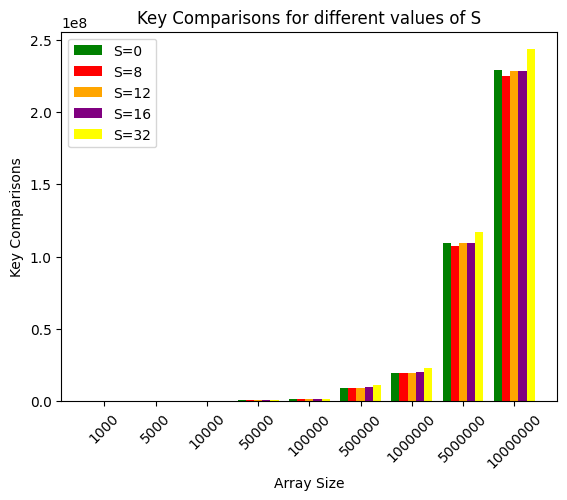

In [11]:
categories = [f"{size}" for size in sizes]

x = np.arange(len(categories))
width = 0.8 / len(comaprison_tests)

for i, test in enumerate(comaprison_tests):
    offset = (i - (len(comaprison_tests) - 1) / 2) * width
    plt.bar(x + offset, test['Y'], width, label=f'S={test["S"]}', color=test['color'])

plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.title('Key Comparisons for different values of S')
plt.xticks(x, categories)
plt.xticks(rotation=45)
plt.legend()
plt.show()

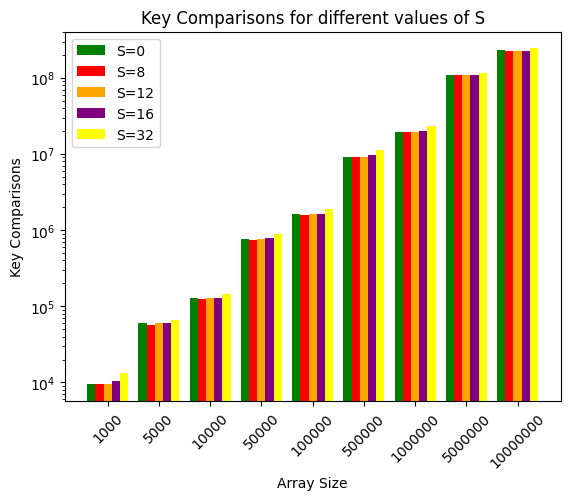

In [12]:
categories = [f"{size}" for size in sizes]

x = np.arange(len(categories))
width = 0.8 / len(comaprison_tests)

for i, test in enumerate(comaprison_tests):
    offset = (i - (len(comaprison_tests) - 1) / 2) * width
    plt.bar(x + offset, test['Y'], width, label=f'S={test["S"]}', color=test['color'])

plt.xlabel('Array Size')
plt.ylabel('Key Comparisons')
plt.title('Key Comparisons for different values of S')
plt.xticks(x, categories)
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend()
plt.show()

**CPU Time Comparisons**

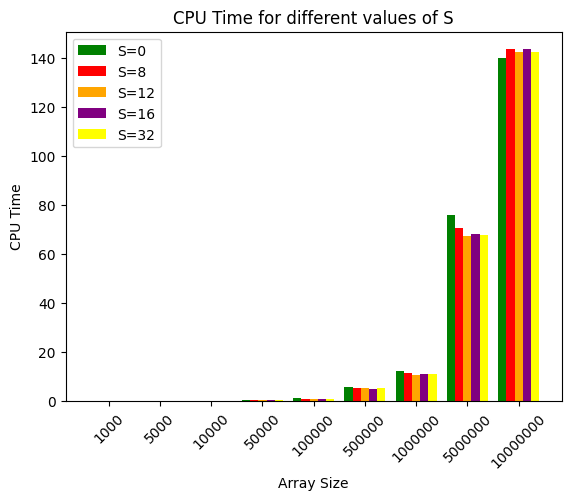

In [13]:
categories = [f"{size}" for size in sizes]

x = np.arange(len(categories))
width = 0.8 / len(comaprison_tests)

for i, test in enumerate(comaprison_tests):
    offset = (i - (len(comaprison_tests) - 1) / 2) * width
    plt.bar(x + offset, test['duration'], width, label=f'S={test["S"]}', color=test['color'])

plt.xlabel('Array Size')
plt.ylabel('CPU Time')
plt.title('CPU Time for different values of S')
plt.xticks(x, categories)
plt.xticks(rotation=45)
plt.legend()
plt.show()